In [13]:
"""
Supervisado

    X -> model -> Y
    minimice una funcion de error

    Clasificacion
    Regresion

No Supervisado
    X -> model -> patrones en la data

    N dimensiones -> PCA, t-SNE

    Clustering
"""

'\nSupervisado\n\n    X -> model -> Y\n    minimice una funcion de error\n\n    Clasificacion\n    Regresion\n\nNo Supervisado\n    X -> model -> patrones en la data\n\n    N dimensiones -> PCA, t-SNE\n\n    Clustering\n'

In [14]:
"""
KMeans
DBScan
MeanShift
"""

# https://github.com/jeremy-jmc/IA-P002
# https://drive.google.com/drive/u/0/folders/1X3AjOQ2G7NZO3U_0KGYzPXex49vx3Iy-

'\nKMeans\nDBScan\nMeanShift\n'

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os

from PIL import Image

In [16]:
def get_max_n_jobs():
    try:
        max_n_jobs = os.cpu_count() or 1  # Use at least 1 if CPU count is not available
        return max_n_jobs
    except NotImplementedError:
        return 1

max_n_jobs = get_max_n_jobs()
print("Max n_jobs supported by your computer:", max_n_jobs)

Max n_jobs supported by your computer: 16


In [17]:
MAX_ALLOW_NJOBS = 4
SEED = 0

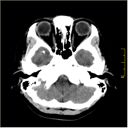

(128, 128, 3)
[[[101  99  89]
  [ 63  62  56]
  [ 63  62  56]
  ...
  [ 63  62  56]
  [ 62  61  55]
  [177 176 167]]

 [[ 60  59  54]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [175 174 166]]

 [[ 63  62  56]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [175 174 166]]

 ...

 [[ 63  62  56]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [175 174 166]]

 [[ 60  59  53]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [174 173 165]]

 [[177 175 167]
  [176 175 167]
  [175 174 166]
  ...
  [175 174 166]
  [175 174 165]
  [226 225 216]]]


In [47]:
# Load the image
image = Image.open("./data/prueba4.BMP")

# reduce the resolution
image = image.resize((128, 128))
display(image)

image_array = np.array(image)
print(image_array.shape)
print(image_array)

In [48]:
# Reshape the image array to a 2D array of shape (num_pixels, num_channels)
num_pixels = image_array.shape[0] * image_array.shape[1]
num_channels = image_array.shape[2]
pixels_2d = image_array.reshape(num_pixels, num_channels)
print(pixels_2d.shape)
print(pixels_2d)

(16384, 3)
[[101  99  89]
 [ 63  62  56]
 [ 63  62  56]
 ...
 [175 174 166]
 [175 174 165]
 [226 225 216]]


In [49]:
# from scipy import stats


# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
# for ax, idx in zip(axes, [0, 1, 2]):
#     data = pixels_2d[:, idx]
#     ax.hist(data, label=f'{idx}', density=True, alpha=.5)
#     xx = np.linspace(data.min(), data.max(), 1000)
#     kde = stats.gaussian_kde(data)
#     ax.plot(xx, kde(xx))
#     ax.legend()
# plt.show()

In [50]:
# from sklearn.preprocessing import MinMaxScaler
# normalized = pixels_2d  # MinMaxScaler().fit_transform(pixels_2d)
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# # plot pixels
# ax.scatter(xs=normalized[:, 0], ys=normalized[:, 1], zs=normalized[:, 2], marker='o', color='green', alpha=0.2)
# ax.view_init(10, 270)
# plt.show()

In [51]:
# https://towardsdatascience.com/how-to-determine-the-right-number-of-clusters-with-code-d58de36368b1

In [62]:
# from sklearn.cluster import DBSCAN

# dbscan = DBSCAN(eps=5, min_samples=1000, n_jobs=MAX_ALLOW_NJOBS)

# labels = dbscan.fit_predict(pixels_2d)
# print(np.unique(labels))

In [90]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=6, random_state=SEED, init="k-means++", n_init="auto")

# labels = kmeans.fit_predict(pixels_2d)
# print(np.unique(labels))

[0 1 2 3 4 5]


In [98]:
from sklearn.cluster import MeanShift

meanshift = MeanShift(bandwidth=None, n_jobs=MAX_ALLOW_NJOBS)

labels = meanshift.fit_predict(pixels_2d)
print(np.unique(labels))

[0 1 2 3]


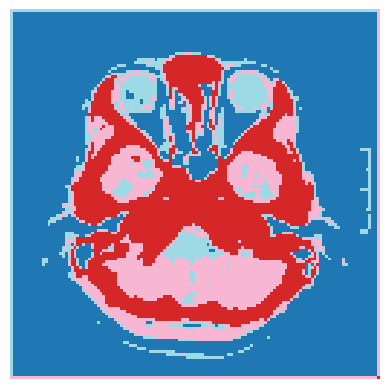

In [99]:
# Reshape the labels to match the original image dimensions
clustered_labels = labels.reshape(image_array.shape[0], image_array.shape[1])

# Visualize the clustered image
plt.imshow(clustered_labels, cmap='tab20', interpolation='nearest')
plt.axis('off')
plt.show()

## Silhouette score

# algorithms

In [100]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from operator import itemgetter
import time
from sklearn.neighbors import KDTree

class DBScan():

    def __init__(self, eps, threshold, m='euclidean'):
        self.data = None        # database
        self.KDT = None
        self.e = eps            # radius
        self.t = threshold
        self.UNDEFINED = 0
        self.NOISE = 1       # minPoints: density treshold

        # cluster of i-th training example
    
    def region_query(self, p):
        N = self.KDT.query_radius([p], r=self.e)[0]  
        N = [n for n in N if self.label[n] in [self.UNDEFINED, self.NOISE] ]
        return np.array(N, dtype=object)

    def execute(self, data):
        """
        
        param: data
        return: label. Lista de clusters para todos los puntos del dataset
        """
        self.data = data       # database
        self.KDT = KDTree(data) 
        self.label = np.array([self.UNDEFINED for _ in range(len(data))])        

        c = 1
        for i in range(len(self.data)):
            label_p = self.label[i]         # label of i-th training example
            if label_p != self.UNDEFINED:
                continue
            # get index of nearest neighbors of i-th trainig example
            NN = self.region_query(self.data.iloc[i])
            
            if len(NN) < self.t:
                self.label[i] = self.NOISE
                continue
            
            c += 1
            self.label[i] = c
            
            # S <- N \ {p}
            S = [NN[_] for _ in np.where(NN!=i)[0]]

            for q in S:
                label_curr = self.label[q]
                if label_curr == self.NOISE:
                    self.label[q] = c
                if label_curr != self.UNDEFINED:
                    continue
                NE = self.region_query(self.data.iloc[q])
                self.label[q] = c
                if len(NE) < self.t:
                    continue
                S += [_ for _ in NE if _ not in S]
        return self.label

In [101]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from operator import itemgetter
import time

# https://www.geeksforgeeks.org/calculate-the-euclidean-distance-using-numpy/
def euclidean(x1, x2):
    return distance.euclidean(x1, x2)

def chebychev(x1, x2):
    return distance.chebyshev(x1, x2)

def manhattan(x1, x2):
    return distance.cityblock(x1, x2)


# https://neptune.ai/blog/k-means-clustering
def rand_centroids(data, k, distance):
    r, c = data.shape
    c_idx = np.random.choice(r, k)
    return data.iloc[c_idx].to_numpy()


def plus_plus(data, k, distance):
    centroids = [ data.sample(n=1).to_numpy().tolist()[0] ]
    for _ in range(k-1):
        new_c = ([],-1)         # centroid, distance to c
        for i in range(len(data)):
            x_i = data.iloc[i].to_numpy().tolist()
            if x_i not in centroids:
                d = 0
                for c in centroids:
                    d += pow(distance(c, x_i), 2)
                d /= len(centroids)
                new_c = (x_i, d) if new_c[1] < d else new_c
        centroids.append(new_c[0])
    return np.matrix(centroids)


class K_Means():
    def __init__(self, n, distance=euclidean, cc=rand_centroids):
        self.data = None
        self.n = n          # n° centroids
        self.K = None
        self.d = distance
        self.cc = cc        # centroid criteria

    def new_centroids(self, idx):
        new_K = [[] for _ in self.K]

        for i in range(len(self.K)):
            # obtener indices de todos los elementos pertenecientes al cluster i de la lista de indeices
            idx_curr_cluster = idx[idx['cluster'] == i]['idx'].to_list()
            # obtener elementos correspondientes al cluster i
            cluster_i_data = self.data.filter(items=idx_curr_cluster, axis = 0)
            if cluster_i_data.empty:
                new_K[i] = self.K[i]
            else:
                new_K[i] = cluster_i_data.mean().to_numpy()
            
        return np.array(new_K, dtype=object)

    def label(self):
        """
        DO: Etiqueta cada punto del dataframe 
        """
        idx = [
                min([(idx, i, self.d(self.K[i], self.data.iloc[idx].to_numpy())) for i in range(len(self.K))], key=itemgetter(2))[:-1] 
                for idx in range(len(self.data))
            ]
        return pd.DataFrame(idx, columns=['idx', 'cluster'])  

    def execute(self, d):
        """
        param d: Conjunto de datos en formato dataframe
        return new_K: Conjunto de labels y ids de clusters
        """
        self.data = d
        new_K = self.cc(self.data, self.n, self.d)

        i = 0
        idx = None
        while not (self.K == new_K).all():
            self.K = new_K
            idx = self.label()
            new_K = self.new_centroids(idx)
            time.sleep(5)
            i += 1
        return new_K, idx


# plotting

In [102]:
# # https://github.com/jeremy-jmc/AI_ML_Basic-Platzi/
# import random 
# from bokeh.plotting import figure, output_file, show

In [103]:
# POINTS_COLOURS = ['turquoise', 'lime', 'dodgerblue', 'fuchsia', 'lightcoral', 'navajowhite']
# CLUSTERS_COLOURS = ['teal', 'green', 'blue', 'purple', 'red', 'goldenrod']

# SIZE_COORD = 10         # size of coordinate to graphic
# MIN_LIMIT = 1           # minimum limit of coordinates
# MAX_LIMIT = 40          # maximum limit of coordinates
# NUM_COORDS = 150        # number of coordinates to clustering
# NUM_CLUSTERS = 3        # number of clusters to clustering

In [104]:

# # generate base coords
# def generate_coords(num_coords, mn, mx):
#     coords = []
#     for i in range(num_coords):
#         coords.append((int(random.uniform(mn, mx)), int(random.uniform(mn, mx))))
#     return coords 

# # generate graph in bokeh
# def generate_graph(coords, loop, clusters, centers):

#     output_file(f"dispersion {loop}.html")
#     x_coords = [c[0] for c in coords]
#     y_coords = [c[1] for c in coords]
#     p = figure(title=f"Dataset {loop}", x_range=(MIN_LIMIT-1, MAX_LIMIT+1), y_range=(MIN_LIMIT-1, MAX_LIMIT+1))

#     if loop>1:      # clusters

#         asterisk_x = [c[0] for c in centers]
#         asterisk_y = [c[1] for c in centers]

        
#         for i in range(len(clusters)):
#             clusters_x = [c[0] for c in clusters[i]]
#             clusters_y = [c[1] for c in clusters[i]]

#             p.scatter(clusters_x, clusters_y , color=CLUSTERS_COLOURS[i], alpha=.5, size=SIZE_COORD)
#             p.asterisk(asterisk_x[i], asterisk_y[i], color=CLUSTERS_COLOURS[i], size=SIZE_COORD+2)
            
#     else:    
#         p.scatter(x_coords, y_coords, color="black", alpha=.5, size=SIZE_COORD)

#     return p

# # generate first random centers of clusters
# def generate_random_centers(num_clusters, mn, mx):
#     c = []
#     for i in range(4):
#         c.append((int(random.uniform(mn, mx)), int(random.uniform(mn, mx))))
#     return c

# # calculate euclidean distance
# def euclidean_distance(coord1, coord2):
#     return ((coord1[0]-coord2[0])**2 + (coord1[1]-coord2[1])**2)*0.5

# # generate list of clusters
# def k_means(centers, coords):
#     clusters = []
#     for i in range(len(centers)):
#         clusters.append([])
    
#     for c in coords:
#         distances = []
#         for i in range(len(centers)):
#             d = euclidean_distance(c, centers[i])
#             distances.append(d)
            
#         md = min(distances)
#         idx = distances.index(md)

#         clusters[idx].append(c)
#     return clusters
    
# # update centers
# def update_centers(clusters):
#     c = []
#     for i in range(len(clusters)):
#         x_clus = [c[0] for c in clusters[i]]
#         y_clus = [c[1] for c in clusters[i]]
        
#         x_new_center = sum(x_clus)/len(x_clus)
#         y_new_center = sum(y_clus)/len(y_clus)
        
#         c.append((x_new_center, y_new_center))
#     return c

# # comparate clusters
# def comparate_clusters(previous_cluster, actual_cluster):
#     for i in range(len(previous_cluster)):
#         if previous_cluster[i][0] != actual_cluster[i][0] or previous_cluster[i][1] != actual_cluster[i][1]:
#             return "distintos"
    
#     return "iguales"

In [105]:
# l = 1

# # generate coordinates
# coords = []
# coords = generate_coords(NUM_COORDS, MIN_LIMIT, MAX_LIMIT)
# print("\n\tCoordinates Generated:\n",coords)

# # plot coordinates
# plot = generate_graph(coords, l, None, None)
# show(plot)
# l+=1

# # generate 1st random centers
# centers = generate_random_centers(NUM_CLUSTERS, MIN_LIMIT, MAX_LIMIT)
# print("\n\tRandom Centers:\n",centers)

# # 1st K-Means
# ## generate clusters
# clusters = k_means(centers, coords)  
# print("\n\tRandom Clusters:\n", clusters)

# ## plot clusters
# plot = generate_graph(coords, l, clusters, centers)
# show(plot)

# p_cluster = []
# for i in range(2, 10):
#     centers = update_centers(clusters)
#     clusters = k_means(centers, coords)

#     plot = generate_graph(coords, i, clusters, centers)        
#     show(plot) 

#     if comparate_clusters(p_cluster, clusters)=="iguales" and i>2:
#         break
#     else: 
#         p_cluster = clusters
        